In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.metrics import *
from sklearn.linear_model  import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df=pd.read_csv('/content/dataset_model.csv',sep=',')

In [0]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
df.shape

(614, 13)

In [0]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [0]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [0]:
#Identify and Remove unique  information about records
for i in df.columns:
  if df[i].is_unique:
    df=df.drop(i,axis=1)
df 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [0]:
#continous columns
continous_col = df._get_numeric_data().columns
con_cols = []
for i in continous_col:
  if(len(df[i].unique())>df.shape[0]/25):
     con_cols.append(i)
print (con_cols)  

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [0]:
#categorial column
cate_col=list(set(df.columns)-set(con_cols))
cat_col=[]
for i in cate_col:
  if(len(df[i].unique())<df.shape[0]/25):  
    cat_col.append(i)
print (cat_col)

['Gender', 'Education', 'Credit_History', 'Married', 'Self_Employed', 'Property_Area', 'Loan_Amount_Term', 'Loan_Status', 'Dependents']


**Outlier Handling**

In [0]:
for i in con_cols:
  print(i,'  : ',(df[i].skew()))

ApplicantIncome   :  6.539513113994625
CoapplicantIncome   :  7.491531216657306
LoanAmount   :  2.677551679256059


In [0]:
for i in con_cols:
  lower = df[i].quantile(0.05)
  upper = df[i].quantile(0.95)
  df[i] = np.where(df[i] < lower,lower,df[i])
  df[i] = np.where(df[i] > upper, upper,df[i])
  print(' After Outlier handling ', i, ' \t ',df[i].skew())

 After Outlier handling  ApplicantIncome  	  1.0177280847006973
 After Outlier handling  CoapplicantIncome  	  0.5184989987479341
 After Outlier handling  LoanAmount  	  0.6317364370380842


**Handling Missing Values**

In [0]:
print('Number of missing values\n')
print(df.isnull().sum())

for i in con_cols:
  df[i]=df[i].fillna(df[i].median())
for j in list(set(df.columns)-set(con_cols)):
  df[j]=df[j].fillna(df[j].mode().iloc[0])
print('after processing number of missing values\n')
print(df.isnull().sum())




Number of missing values

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
after processing number of missing values

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


**Use Label Encoder as encoding technique on features , predict using below algorithms**



In [0]:
le = LabelEncoder()
df_tar = pd.DataFrame(le.fit_transform(df['Loan_Status']))
df_tar.columns = (['Loan_Status'])
df_tar.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [0]:
print(df_tar['Loan_Status'].value_counts())
lbl_1,lbl_0 = df_tar['Loan_Status'].value_counts()
print('Label 1 class %age: ',((lbl_1*100)/df_tar['Loan_Status'].count()))
print('Label 0 class %age: ',((lbl_0*100)/df_tar['Loan_Status'].count()))

1    422
0    192
Name: Loan_Status, dtype: int64
Label 1 class %age:  68.72964169381108
Label 0 class %age:  31.270358306188925


In [0]:
df=df.drop(columns='Loan_Status')
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [0]:
cat_col=list(set(cat_col)-set(['Loan_Status']))
cat_col


['Gender',
 'Education',
 'Credit_History',
 'Married',
 'Self_Employed',
 'Property_Area',
 'Loan_Amount_Term',
 'Dependents']

In [0]:
#encoding the categorial columns
en=df.copy()
for j in cat_col:
  en['en_'+str(j)] = le.fit_transform(en[j])
en=en.drop(columns=cat_col)
en.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,en_Gender,en_Education,en_Credit_History,en_Married,en_Self_Employed,en_Property_Area,en_Loan_Amount_Term,en_Dependents
0,5849.0,0.0,128.0,1,0,1,0,0,2,8,0
1,4583.0,1508.0,128.0,1,0,1,1,0,0,8,1
2,3000.0,0.0,71.0,1,0,1,1,1,2,8,0
3,2583.0,2358.0,120.0,1,1,1,1,0,2,8,0
4,6000.0,0.0,141.0,1,0,1,0,0,2,8,0


In [0]:
en.shape

(614, 11)

In [0]:
#training and testing
X_train, x_test, Y_train, y_test = train_test_split(en,df_tar,test_size = 0.25, random_state = 20, stratify = df_tar)
print("Train (X_train) Feature set :",(len(X_train)))
print("Train (Y_train) Label Feature set :",(len(Y_train)))
print("Test (x_test)   Feature set :",(len(x_test)))
print("Test (y_test)   Label set :",(len(y_test)))

Train (X_train) Feature set : 460
Train (Y_train) Label Feature set : 460
Test (x_test)   Feature set : 154
Test (y_test)   Label set : 154


In [0]:
#Stratified Sampling
print("For Training Data :")
print(Y_train['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_train['Loan_Status'].value_counts()
print("Label 1 class %age: ",((lbl_1*100)/Y_train['Loan_Status'].count()))
print("Label 0 class %age: ",((lbl_0*100)/Y_train['Loan_Status'].count()))
print("\nFor Test Set :")
print(y_test['Loan_Status'].value_counts())
lbl_1,lbl_0 = y_test['Loan_Status'].value_counts()
print("Label 1 class %age: ",((lbl_1*100)/y_test['Loan_Status'].count()))
print("Label 0 class %age: ",((lbl_0*100)/y_test['Loan_Status'].count()))

For Training Data :
1    316
0    144
Name: Loan_Status, dtype: int64
Label 1 class %age:  68.69565217391305
Label 0 class %age:  31.304347826086957

For Test Set :
1    106
0     48
Name: Loan_Status, dtype: int64
Label 1 class %age:  68.83116883116882
Label 0 class %age:  31.16883116883117


1.Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on -

Precision ,Recall & F1 Score ,AUROC

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [0]:
logistic_regression = LogisticRegression(random_state=20)
logistic_regression.fit(X_train, Y_train)
y_pred = logistic_regression.predict(x_test)
print("y_pred : ",y_pred)

y_pred :  [1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1
 0 1 1 1 1 0]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
print("Confusion Matrix       : \n" ,confusion_matrix(y_test,y_pred))
print("Accuracy of Logistic Regression Model      : ",accuracy_score(y_test, y_pred))
print("Precision of Logistic Regression Model     : ",precision_score(y_test, y_pred))
print("Recall of Logistic Regression Model        : " , recall_score(y_test, y_pred))
print("F1 Score of Logistic Regression Model      : " ,f1_score(y_test, y_pred))
print("ROC_AUC score of Logistic Regression Model : " ,roc_auc_score(y_test,y_pred))

Confusion Matrix       : 
 [[ 19  29]
 [  6 100]]
Accuracy of Logistic Regression Model      :  0.7727272727272727
Precision of Logistic Regression Model     :  0.7751937984496124
Recall of Logistic Regression Model        :  0.9433962264150944
F1 Score of Logistic Regression Model      :  0.851063829787234
ROC_AUC score of Logistic Regression Model :  0.6696147798742138


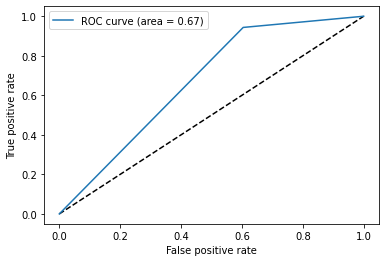

In [0]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

2.Using RandomForest Classifier - Perform the parameter tuning and list your best performance metrics on

Precision ,Recall & F1 Score ,AUROC

In [70]:
from sklearn.ensemble import RandomForestClassifier
X_train, x_test, Y_train, y_test = train_test_split(en,df_tar,test_size = 0.25, random_state = 20, stratify = df_tar)
Ran_forest = RandomForestClassifier(random_state=20)
Ran_forest.fit(X_train,Y_train)
y_pred = Ran_forest.predict(x_test)
print("y_pred : ",y_pred)

y_pred :  [1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1
 1 1 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [71]:
print("Confusion Matrix       : \n" ,confusion_matrix(y_test,y_pred))
print("Accuracy of Ran_forest Model      : ",accuracy_score(y_test, y_pred))
print("Precision of Ran_forest Model     : ",precision_score(y_test, y_pred))
print("Recall of Ran_forest Model        : " , recall_score(y_test, y_pred))
print("F1 Score of Ran_forest Model      : " ,f1_score(y_test, y_pred))
print("ROC_AUC score of Ran_forest Model : " ,roc_auc_score(y_test,y_pred))

Confusion Matrix       : 
 [[ 22  26]
 [  5 101]]
Accuracy of Ran_forest Model      :  0.7987012987012987
Precision of Ran_forest Model     :  0.7952755905511811
Recall of Ran_forest Model        :  0.9528301886792453
F1 Score of Ran_forest Model      :  0.8669527896995708
ROC_AUC score of Ran_forest Model :  0.7055817610062893


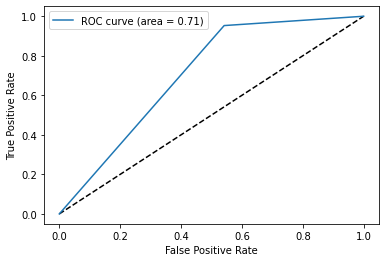

In [72]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

**Use One hot Encoder as encoding technique on feature , predict using the below algorithms**

In [0]:
ohe = df.copy()

In [59]:
cat_col

['Gender',
 'Education',
 'Credit_History',
 'Married',
 'Self_Employed',
 'Property_Area',
 'Loan_Amount_Term',
 'Dependents']

In [61]:
for j in cat_col :
   ohe = pd.get_dummies(ohe, columns=[j], prefix=[j] )
ohe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Credit_History_0.0,Credit_History_1.0,Married_No,Married_Yes,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,5849.0,0.0,128.0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1,4583.0,1508.0,128.0,0,1,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,3000.0,0.0,71.0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
3,2583.0,2358.0,120.0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4,6000.0,0.0,141.0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [62]:
X_train, x_test, Y_train, y_test = train_test_split(ohe,df_tar,test_size = 0.25, random_state = 20, stratify = df_tar)
print("Train (X_train) Feature set :",(len(X_train)))
print("Train (Y_train) Label Feature set :",(len(Y_train)))
print("Test (x_test)   Feature set :",(len(x_test)))
print("Test (y_test)   Label set :",(len(y_test)))

Train (X_train) Feature set : 460
Train (Y_train) Label Feature set : 460
Test (x_test)   Feature set : 154
Test (y_test)   Label set : 154


In [63]:
#Stratified Sampling
print("For Training Data :")
print(Y_train['Loan_Status'].value_counts())
lbl_1,lbl_0 = Y_train['Loan_Status'].value_counts()
print("Label 1 class %age: ",((lbl_1*100)/Y_train['Loan_Status'].count()))
print("Label 0 class %age: ",((lbl_0*100)/Y_train['Loan_Status'].count()))
print("\nFor Test Set :")
print(y_test['Loan_Status'].value_counts())
lbl_1,lbl_0 = y_test['Loan_Status'].value_counts()
print("Label 1 class %age: ",((lbl_1*100)/y_test['Loan_Status'].count()))
print("Label 0 class %age: ",((lbl_0*100)/y_test['Loan_Status'].count()))

For Training Data :
1    316
0    144
Name: Loan_Status, dtype: int64
Label 1 class %age:  68.69565217391305
Label 0 class %age:  31.304347826086957

For Test Set :
1    106
0     48
Name: Loan_Status, dtype: int64
Label 1 class %age:  68.83116883116882
Label 0 class %age:  31.16883116883117


3.Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on -

Precision ,Recall & F1 Score ,AUROC

In [64]:
logistic_regression = LogisticRegression(random_state=20)
logistic_regression.fit(X_train, Y_train)
y_pred = logistic_regression.predict(x_test)
print("y_pred : ",y_pred)

y_pred :  [1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1
 1 1 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [65]:
print("Confusion Matrix       : \n" ,confusion_matrix(y_test,y_pred))
print("Accuracy of Logistic Regression Model      : ",accuracy_score(y_test, y_pred))
print("Precision of Logistic Regression Model     : ",precision_score(y_test, y_pred))
print("Recall of Logistic Regression Model        : " , recall_score(y_test, y_pred))
print("F1 Score of Logistic Regression Model      : " ,f1_score(y_test, y_pred))
print("ROC_AUC score of Logistic Regression Model : " ,roc_auc_score(y_test,y_pred))

Confusion Matrix       : 
 [[ 20  28]
 [  4 102]]
Accuracy of Logistic Regression Model      :  0.7922077922077922
Precision of Logistic Regression Model     :  0.7846153846153846
Recall of Logistic Regression Model        :  0.9622641509433962
F1 Score of Logistic Regression Model      :  0.864406779661017
ROC_AUC score of Logistic Regression Model :  0.6894654088050314


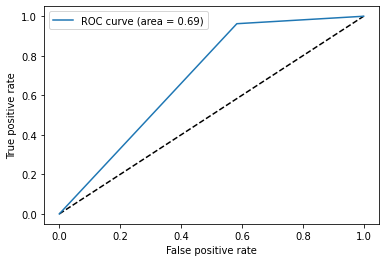

In [66]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc='best')

4.Using RandomForest Classifier - Perform the parameter tuning and list your best performance metrics on -

Precision ,Recall & F1 Score ,AUROC

In [79]:
X_train, x_test, Y_train, y_test = train_test_split(ohe,df_tar,test_size = 0.25, random_state = 20, stratify = df_tar)
Ran_forest = RandomForestClassifier(random_state=20)
Ran_forest.fit(X_train,Y_train)
y_pred = Ran_forest.predict(x_test)
print("y_pred : ",y_pred)

y_pred :  [1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1
 1 1 1 1 1 0]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
print("Confusion Matrix       : \n" ,confusion_matrix(y_test,y_pred))
print("Accuracy of Ran_forest Model      : ",accuracy_score(y_test, y_pred))
print("Precision of Ran_forest Model     : ",precision_score(y_test, y_pred))
print("Recall of Ran_forest Model        : " , recall_score(y_test, y_pred))
print("F1 Score of Ran_forest Model      : " ,f1_score(y_test, y_pred))
print("ROC_AUC score of Ran_forest Model : " ,roc_auc_score(y_test,y_pred))

Confusion Matrix       : 
 [[22 26]
 [ 8 98]]
Accuracy of Ran_forest Model      :  0.7792207792207793
Precision of Ran_forest Model     :  0.7903225806451613
Recall of Ran_forest Model        :  0.9245283018867925
F1 Score of Ran_forest Model      :  0.8521739130434782
ROC_AUC score of Ran_forest Model :  0.691430817610063


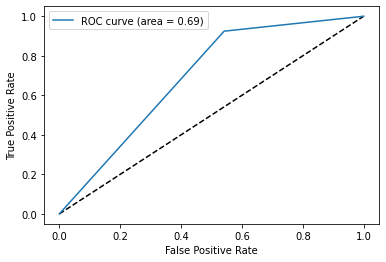

In [81]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(y_test,y_pred))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')

Which approach between Label Encoding & One Hot Encoding gave better results in case of both the algorithms used ?


One hot encoding gave better results in both the algorithms.